In [3]:
from PIL import Image
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from skimage import io
from sklearn.decomposition import PCA
import random
from numpy.linalg import svd
import os
import matplotlib.pyplot as plt 
import cv2 

In [11]:
#X = cv2.imread('/Users/karlaburhenne/Desktop/Bachelor/Files/sperm_0p2_40hz_12t_00068.BTF')
K = cv2.imread("/Users/karlaburhenne/Desktop/Layers/70_hz/Layer_207.png", 0)

0.0 1.0 1 0.0
0.17391304347826086 0.06090331385678338 -0.7071067811865475 -0.7071067811865475
[0.17391304347826086, 0.5827242788840895] [0.06090331385678338, 0.4172757211159106]


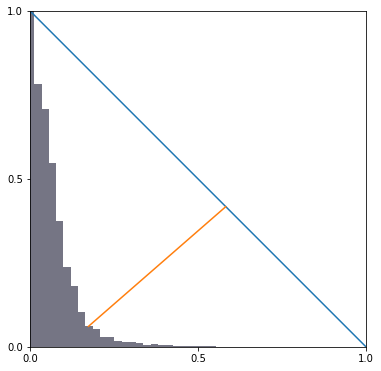

In [109]:
from skimage.filters import threshold_triangle

img = K 

bins = np.arange(0, 256)

def plot_triangle_threshold(im, bins, thresh, pos=None):
    if pos:
        plt.subplot(pos)

    # Create a histogram, identify peak and normalize counts between 0 and 1
    # Note: here we assume the peak is always to the left and we threshold to the right!
    # The proper triangle threshold flips sometimes
    hist, bin_edges = np.histogram(im.ravel(), bins=bins)
    peak_ind = np.argmax(hist)
    peak_height = hist[peak_ind]
    hist = hist / peak_height

    # Identify bin centers
    # Find last bin with non-zero count
    centers = (bin_edges[1:] + bin_edges[:-1])/2.0
    ind_low, ind_high = np.where(hist > 0)[0][[0, -1]]    

    # Shift bin centers according to peak (simplified plotting)
    centers = centers - centers[peak_ind]

    # Compute 'width' of the triangle (base length)
    # Normalize centers so width becomes 1
    width = (centers[ind_high] - centers[peak_ind])
    centers = centers / width

    # Plot histogram with new values
    plt.hist(centers, bins=len(hist), weights=hist, color=(0.1, 0.1, 0.2, 0.6))

    # Plot from peak to base
    x1 = centers[peak_ind]
    y1 = hist[peak_ind]
    x2 = 1
    y2 = hist[-1]
    print(x1,y1,x2,y2)
    plt.plot([x1, x2], [y1, y2])

    # Plot from threshold to peak line
    x3 = centers[int(thresh)]
    y3 = hist[int(thresh)]
    n = np.sqrt((y2 - y1)**2 + (x2 - x1)**2)
    x4 = (y2 - y1) / n
    y4 = -(x2 - x1) / n
    print(x3,y3,x4,y4)
    # Find intersection
    # Thank you, wikipedia
    # https://en.wikipedia.org/wiki/Line–line_intersection#Given_two_points_on_each_line
    D = (x1 - x2)*(y3 - y4) - (y1 - y2)*(x3 - x4)
    px = ((x1*y2 - y1*x2)*(x3 - x4) - (x1 - x2)*(x3*y4 - y3*x4))/D
    py = ((x1*y2 - y1*x2)*(y3 - y4) - (y1 - y2)*(x3*y4 - y3*x4))/D
    plt.plot([x3, px], [y3, py])
    print([x3, px], [y3, py])

    # Setup display
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xticks([0, 0.5, 1.0])
    plt.yticks([0, 0.5, 1.0])
    plt.gca().set_aspect('equal')



fig = plt.figure(figsize=(15,15))
thresh_cell = threshold_triangle(img)

# plt.show(img, title=f"Triangle method (threshold = {thresh_cell:.1f})", pos=331)
# plt.show(img > thresh_cell, pos=334)
plot_triangle_threshold(img, bins=bins, thresh=thresh_cell, pos = 337)

plt.tight_layout()
#glue_fig('fig_thresholds_method_triangle', fig)

(400, 400)


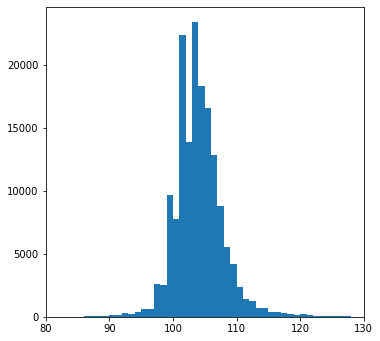

In [102]:
print(K.shape) # Layer_207_8

#plt.figure().set_figheight(6)
plt.figure(figsize=(5.7, 5.7))
#plt.figure().set_figwidth(8)
plt.hist(K.ravel(),256,[0,256])
#plt.figure(figsize=(15, 15))
# plt.xlabel("Pixel intensity")
# plt.ylabel("Amount of pixels")
plt.xlim(80,130)


plt.show()

In [ ]:
X[0].shape

(12, 348, 348)

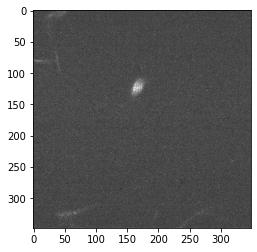

In [ ]:
Y = X[411][8]
# img = Image.fromarray(Y)
# img = img.convert('RGB')
# img.save("/Users/karlaburhenne/Desktop/Layers/Layer_.png")
plt.imshow(Y,cmap='gray')

for i in range(400,450): 
    img = Image.fromarray(X[i][8])
    img = img.convert('RGB')
    img.save("/Users/karlaburhenne/Desktop/Layers/Layer_40"+str(i)+".png")


In [ ]:
#F = io.imread('/Users/karlaburhenne/Desktop/sperm_0p2_40hz_12t_00068.BTF')


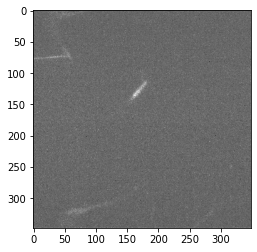

In [ ]:
H_10 = F[400][8]
plt.imshow(H_10, cmap='gray')